MINI PROYECTO 1
Por: Ivette Cardona y Cristian Pérez

Ejercicio 1 - Triángulo de Shierpinski

In [2]:
#Show plots
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


c:\users\dell\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
import k3d
import numpy as np

Nx, Ny  = 34, 33
xmin, xmax = -3, 4
ymin, ymax = -0, 3

x = np.linspace(xmin, xmax, Nx)
y = np.linspace(ymin, ymax, Ny)
x, y = np.meshgrid(x, y)
f = np.sin(x**2 + y**2)

plot = k3d.plot()
plt_surface = k3d.surface(f.astype(np.float32), bounds=[xmin,xmax,ymin,ymax])
plot += plt_surface
plot.display()
print("si")

Output()

si


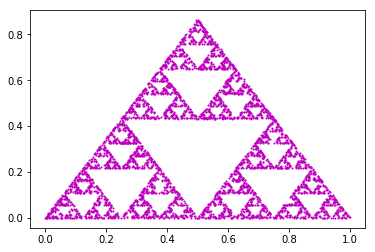

In [13]:
import numpy as np
import pylab
from random import randint

def midpoint(point1, point2):
    return [(point1[0] + point2[0])/2, (point1[1] + point2[1])/2]

curr_point = [0,0]  # our seed value for the chaos game
                    # It can fall anywhere inside the triangle

# vertices
v1 = [0,0]
v2 = [1,0]
v3 = [.5,np.sqrt(3)/2]

# Plot 5000 points
for _ in range(5000):
    # choose a triangle vertex at random
    # set the current point to be the midpoint
    # between the previous current point and
    # the randomly chosen vertex
    val = randint(0,2)
    if val == 0:
        curr_point = midpoint(curr_point, v1)
    if val == 1:
        curr_point = midpoint(curr_point, v2)
    if val == 2:
        curr_point = midpoint(curr_point, v3)
    # plot the new current point
    pylab.plot(curr_point[0],curr_point[1],'m.',markersize=2)

pylab.show()

Ejercicio 2

In [20]:
from random import choices
import matplotlib.pyplot as plt


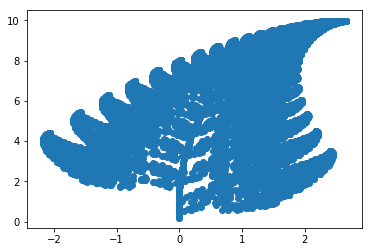

In [27]:
def f1_2(point1, point2):
    x = point1 * 0.85 + point2 * 0.04 + 0.0
    y = point1 * (-0.04) + point2 * 0.85 + 1.6
    return x, y

def f2_2(point1, point2):
    x = point1 * (-0.15) + point2 * 0.28 + 0.0
    y = point1 * 0.26 + point2 * 0.24 + 0.44
    return x, y

def f3_2(point1, point2):
    x = point1 * 0.2 + point2 * (-0.26) + 0.0
    y = point1 * 0.23 + point2 * 0.22 + 1.6
    return x, y

def f4_2(point1, point2):
    x = point1 * 0.0 + point2 * 0.0
    y = point1 * 0.0 + point2 * 0.16
    return x, y

#initial point
initial_point = 0,0

pick_func = choices(
     population=[1, 2, 3, 4],
     weights=[0.85, 0.07, 0.07, 0.01],
     k=10000
)

points_to_plot_x = []
points_to_plot_y = []
for func in pick_func:
    if func == 1:
        initial_point = f1_2(initial_point[0],initial_point[1])
        points_to_plot_x.append(initial_point[0])
        points_to_plot_y.append(initial_point[1])
        
    elif func == 2:
        initial_point = f2_2(initial_point[0],initial_point[1])
        points_to_plot_x.append(initial_point[0])
        points_to_plot_y.append(initial_point[1])
    elif func == 3:
        initial_point = f3_2(initial_point[0],initial_point[1])
        points_to_plot_x.append(initial_point[0])
        points_to_plot_y.append(initial_point[1])
    elif func == 4:
        initial_point = f4_2(initial_point[0],initial_point[1])
        points_to_plot_x.append(initial_point[0])
        points_to_plot_y.append(initial_point[1])
#print(points_to_plot)
plt.scatter(points_to_plot_x,points_to_plot_y)
plt.show()




Ejercicio 3 - Análisis de pseudorandoms

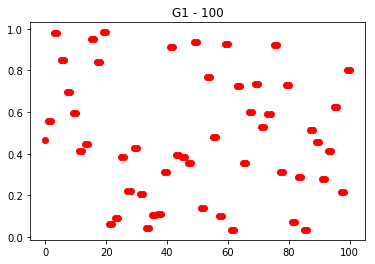

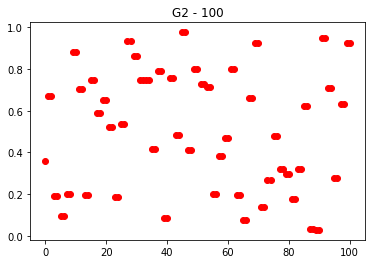

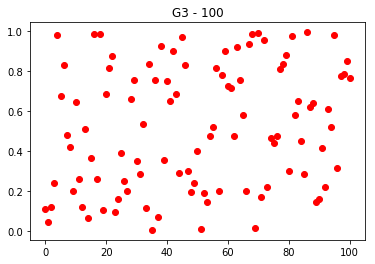

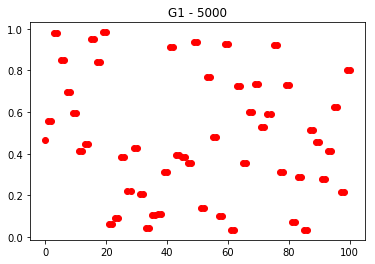

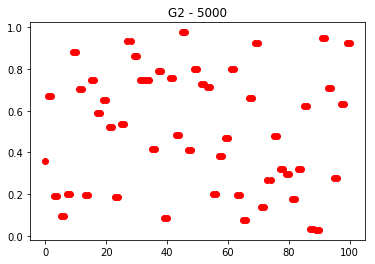

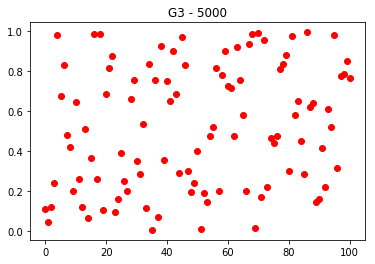

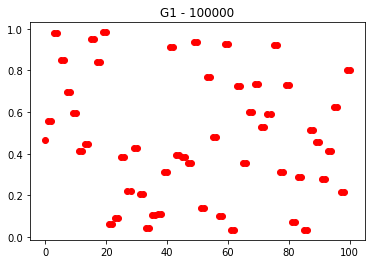

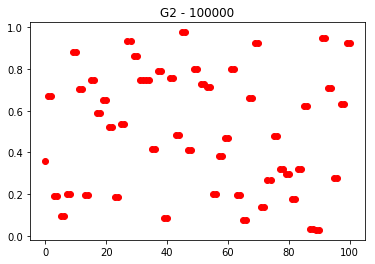

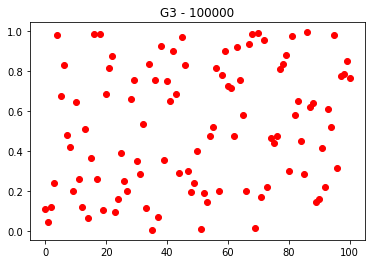

In [11]:
from matplotlib import pyplot as plt
import time
import random

seed = time.time()
mod_arr = [((2**35) -1), ((2**31) -1)]

def fun1(x):
    num = 5**5 * x % ((2**35) -1)
    return num

def fun2(x):
    num = 7**5 * x % ((2**31) -1)
    return num


def normaliza(arr, modulo):
    i = 0
    new_arr = []
    for i in range(len(arr)):
        norm = arr[i] / modulo
        i = i + 1
        new_arr.append(norm)
        
    return new_arr

def generator1(x, repetitions):
    gen1 = []
    num = fun1(x)
    gen1.append(num)
    num = fun1(gen1[-1])
    gen1.append(num)
    i = 2
    while(i <= repetitions):
        num = fun1(gen1[-2])
        gen1.append(num)
        i = i + 1
    arr = normaliza(gen1, mod_arr[0])
    return arr

def generator2(x, repetitions):
    gen2 = []
    num = fun2(x)
    gen2.append(num)
    num = fun2(gen2[-1])
    gen2.append(num)
    i = 2
    while(i <= repetitions):
        num = fun2(gen2[-2])
        gen2.append(num)
        i = i + 1
    arr = normaliza(gen2, mod_arr[1])
    return arr

def generator3(repetitions): 
    gen3 = []
    i = 0
    while(i <= repetitions):
        num = random.uniform(0, 1)
        gen3.append(num)
        i = i + 1
    return gen3

def plot_gen(g, tit):
    nums = list(range(len(g)))
    plt.title(tit)
    plt.plot(nums, g, 'ro')
    plt.show()

    
g1 = generator1(seed, 100)
g2 = generator2(seed, 100)
g3 = generator3(100)

g4 = generator1(seed, 5000)
g5 = generator2(seed, 5000)
g6 = generator3(5000)

g7 = generator1(seed, 100000)
g8 = generator2(seed, 100000)
g9 = generator3(100000)

plot_gen(g1, "G1 - 100")
plot_gen(g2, "G2 - 100")
plot_gen(g3, "G3 - 100")

plot_gen(g1, "G1 - 5000")
plot_gen(g2, "G2 - 5000")
plot_gen(g3, "G3 - 5000")

plot_gen(g1, "G1 - 100000")
plot_gen(g2, "G2 - 100000")
plot_gen(g3, "G3 - 100000")

Ejercicio 4

In [7]:
#para transformar la integral primero debemos observar que nuestra funcion es cuadratica por lo que la integral de -infinito
#hasta infinito es equivalente a 2 veces la integral de 0 a infinito. Luego ya podemos aplicar la transformacion de montecarlo
#la cual resulta en la funcion(e^([-1/x+1)^2]/x^2) * 2

In [2]:
from random import random, uniform
from math import sqrt, pi, e
import numpy as np

In [19]:
def uniform_rand(mini,maxim):
    rango = maxim - mini
    eleccion = uniform(0,1)
    return mini + rango * eleccion

def montecarlo(runs):
    lower_bound = 0
    upper_bound = 1
    sum_of_samples = 0
    for i in range(runs):
        x1 = uniform_rand(lower_bound,upper_bound)
        sum_of_samples += 2 * ((e ** (-(-1 + x1** -1) ** 2))/x1 ** 2)
    result = float(sum_of_samples/runs) 
    print(result)

montecarlo(100)
montecarlo(10000)
montecarlo(100000)

        

1.9538792672639027
1.76297268491132
1.7677575343394172


Ejercicio 5

In [29]:
from random import random, uniform
from math import sqrt, pi, e
import numpy as np

In [42]:
def uniform_rand(mini,maxim):
    rango = maxim - mini
    eleccion = uniform(0,1)
    return mini + rango * eleccion

def montecarlo(runs):
    lower_bound = 0
    upper_bound = 1
    sum_of_samples = 0
    for i in range(runs):
        x1 = uniform_rand(lower_bound,upper_bound)
        sum_of_samples += (((e ** (1-(1/x1)))/x1**2))/2 
    result = float(sum_of_samples/runs) 
    print(result)

montecarlo(100)
montecarlo(10000)
montecarlo(100000)


0.527621837584929
0.5024810936836593
0.5001218215412079
